In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
ts_df = pd.read_csv('tute1.csv')

In [33]:
ts_df.head()

,Date,Sales,AdBudget,GDP,Month,Year,quarter
0,Mar-81,1020.2,659.2,251.8,Mar,81,1
1,Jun-81,889.2,589.0,290.9,Jun,81,2
2,Sep-81,795.0,512.5,290.8,Sep,81,3
3,Dec-81,1003.9,614.1,292.4,Dec,81,4
4,Mar-82,1057.7,647.2,279.1,Mar,82,1


In [8]:
ts_df.columns = ['Date', 'Sales', 'AdBudget', 'GDP']

In [11]:
ts_df['Month'] = ts_df['Date'].apply(lambda x: x[0:3])

In [15]:
ts_df['Year'] = ts_df['Date'].apply(lambda x: int(x[-2:]))

In [25]:
months = list(ts_df.Month.unique())
quarter_map = {}
for idx, m in enumerate(months):
    quarter_map[m] = idx+1
    

In [30]:
ts_df['quarter'] = ts_df['Month'].apply(lambda x: quarter_map[x])

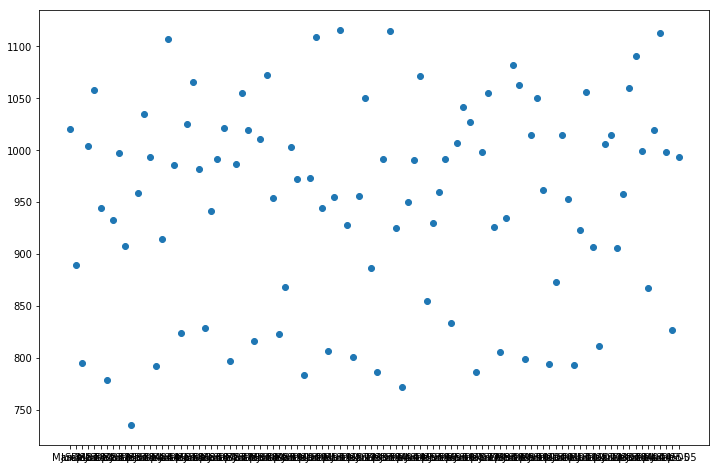

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(ts_df['Date'], ts_df['Sales'])

In [39]:
sales_change = ts_df['Sales'].pct_change()

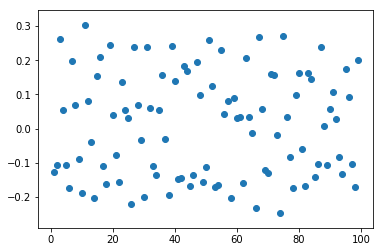

In [42]:
plt.scatter(sales_change.index, sales_change)

In [44]:
autocorrelation = sales_change.autocorr()
print("The autocorrelation of quarterly sales is %4.2f" %(autocorrelation))

The autocorrelation of quarterly sales is -0.16
